# 0. Import libs

In [1]:
%pylab inline

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import os
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import plotly.graph_objs as go

#многопоточность если потребуется
from multiprocessing import Pool , Process
from multiprocessing import Manager

Populating the interactive namespace from numpy and matplotlib


In [2]:
#импортируем всякие вспомогательные библиотеки, если будет время поиграться
#а также библиотеки для отрисовки графиков
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import VotingClassifier as vc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier as sgd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Lasso as las
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score



In [141]:
# новая колонка, в которой 1 если поле меньше чего то или 0
def ThresoldFieldEncoder(InsertDataFrame, FieldName : str, NewFieldName : str, Thresold: float):
    InsertDataFrame[NewFieldName] = InsertDataFrame[FieldName].apply(lambda x: 1 if x > Thresold else 0)
    return InsertDataFrame
# новая колонка, в которой mean(y) для каждого значения / категории
def TargetFieldEncoder(InsertDataFrame, FieldName : str, NewFieldName : str):
    #InsertDataFrame[NewFieldName] = InsertDataFrame[FieldName].apply()
    return InsertDataFrame
def TargetEncoderFunction(Cell, InsertDataFrame, TargetName):
    
    return Cell
    
    
    

In [162]:
train["j1"] = train["job"].apply(lambda x: 'n1')
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,pdays_te,j1
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1,n1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,1,n1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1,n1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1,n1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,n1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,47,services,married,high.school,no,no,no,cellular,aug,fri,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,1,n1
3218,55,blue-collar,married,basic.6y,unknown,no,no,cellular,jul,tue,...,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,1,n1
3219,46,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0,1,n1
3220,24,student,single,high.school,no,yes,no,cellular,apr,thu,...,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0,1,n1


# load data

In [6]:
#посмотрим на комментарии ц excel файле, соответствующие столбцам
#интересно, детальная расшифровка полей
from openpyxl import Workbook
from openpyxl import load_workbook

wb = load_workbook(r'D:\Зубарев (D)\Git\Machine-learning-course-task\1_fullworkbook 2\data\Task_Python.xlsx')
ws = wb["Train"] # or whatever sheet name

for nrow, row in enumerate(ws.rows):
    if nrow == 1:
        break
    for cell in row:
        if not cell.comment is None:
            start = str(cell.comment).find('\n') + 1
            end = str(cell.comment).find(' by П')
            print(f'{cell.value}: {str(cell.comment)[start:end]}')
del wb, ws

default: has default loan?
housing: has housing loan?
loan: has personal loan?
contact: contact communication type
month: last contact month of year 
day_of_week: last contact day of the week 
duration:  last contact duration, in seconds
campaign: number of contacts performed during this campaign 
pdays: number of days that passed by after the client was last contacted from a previous campaign  999 - was not previously contacted)
previous: number of contacts performed before this campaign 
poutcome: outcome of the previous marketing campaign 
emp.var.rate: employment variation rate - quarterly indicator 
cons.price.idx: consumer price index - monthly indicator 
cons.conf.idx: consumer confidence index - monthly indicator 
euribor3m: the rate of interest - daily indicator
nr.employed: number of employees - quarterly indicator 
y: has the client subscribed a product


In [9]:
#загрузим данные из excel посмотрим
data = pd.read_excel('D:/Зубарев (D)/Git/Machine-learning-course-task/1_fullworkbook 2/data/Task_Python.xlsx', sheet_name='Train', nrows=3223, usecols='A:U', index_col=None)
print(data.shape)
with pd.option_context('max_columns',25):
    display(data.head())
#на всякий случай сохранил данные в csv формат, чтобы удобнее работать и проверять

(3222, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
#data.groupby(['duration'])[['y']].mean()

In [25]:
train_directory = "D:/Зубарев (D)/Git/Machine-learning-course-task/1_fullworkbook 2/data/train.csv"
test_directory = "D:/Зубарев (D)/Git/Machine-learning-course-task/1_fullworkbook 2/data/test.csv"
train = pd.read_csv(train_directory, header=0 )
test = pd.read_csv(test_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]
train0 = train.copy()

In [14]:
#выделим категариальные признаки  и количественные признаки

cat_feats = []
num_feats = []

for feat in train.dtypes.keys():
    if train.dtypes[feat] == 'object' and feat != 'y':
        cat_feats.append(feat)
    elif feat != 'y':
        num_feats.append(feat)
        

# создание модели зависимости на основании ансамбля деревьев решений

In [18]:
#создайте модель ансамбля деревьев решений на основании количественных переменных (num_feats)
#задайте количество деревьев (n_estimators ) = 30
#зафиксируйте генератор случайных чисел (random_state) на значении 22031990
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 20 , random_state = 11)
rf.fit(train[num_feats] , train['y'])


RandomForestClassifier(n_estimators=20, random_state=11)

# Оценка качества модели для построения выводов

In [19]:
#проверьте, какое качество прогноза модели получилось на обучающих данных
#какова итоговая вероятность определения правильного значения y?

from sklearn import metrics
print(metrics.roc_auc_score(train['y'], rf.predict(train[num_feats])))



0.9913630568326701


# оценка важности признаков на таргет

In [43]:
#нарисуйте график Feature Importance
#какие топ 3 фактора влияют на итоговую переменную y?
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 20 , random_state = 11)
rf.fit(train[num_feats] , train['y'])

#отразим важные факторы для анализа потенциальных зависимостей в данных при всей выборке
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, train[num_feats], train['y'], r2)

perm_imp_rfpimp

,Importance
Feature,
duration,1.191927
euribor3m,0.410795
nr.employed,0.379674
age,0.329881
campaign,0.252079
cons.conf.idx,0.152492
pdays,0.121371
emp.var.rate,0.118259
cons.price.idx,0.102699


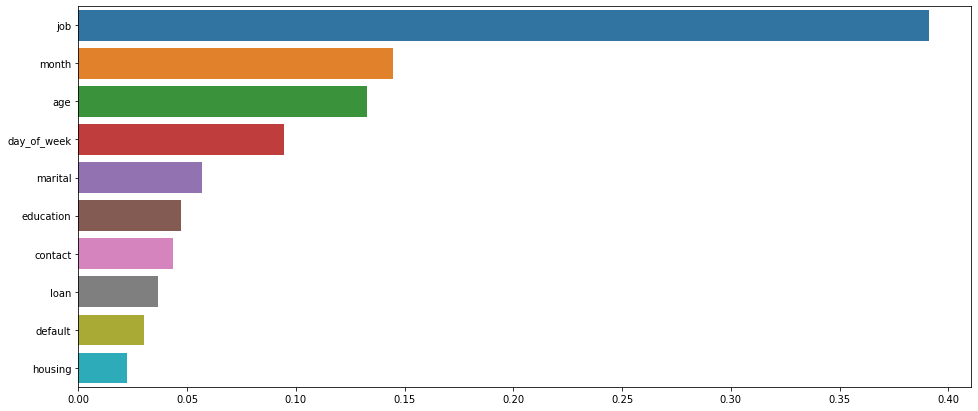

In [22]:
model = RandomForestClassifier(n_estimators=30, random_state=22031990)
model.fit(train[num_feats], train['y'])

#нарисуйте график Feature Importance
#какие топ 3 фактора влияют на итоговую переменную y?

indices = np.argsort(model.feature_importances_)[::-1][:40]
g = sns.barplot(y=train.columns[indices][:40], x=model.feature_importances_[indices][:40]
                ,orient='h')

#отразим важные факторы для анализа потенциальных зависимостей в данных при всей выборке

# фильтрация признаков

In [44]:
#постройте модель итеративно выбирая лучшие показатели и добавляя только самые значимые переменные.
#сделайте модель на тооп 3 факторах из всего train
#посмотрите, какие наиболее значимые фактооры получились?
from sklearn import ensemble


rf = ensemble.RandomForestClassifier(n_estimators = 20 , random_state = 11)
rf.fit(train[num_feats] , train['y'])

np.mean(train['y'] != rf.predict(train[num_feats]))

0.002482929857231533

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train[train.columns[:-1]], train['y'], test_size = 0.3, random_state=11)

factors = X_train[num_feats]

want_factors = 3
factor_result = {}
best_factors = []                                                    

for i in range(want_factors):
    factor_result[i] = {}                                                
    for factor in factors:
        fit_factors = [factor]
        fit_factors.extend(best_factors)
        rf = RandomForestClassifier(n_estimators=10, random_state=11)
        rf.fit(X_train[fit_factors], y_train)

        err_train = np.mean( y_train != rf.predict(X_train[fit_factors]))
        err_test = np.mean( y_test != rf.predict(X_test[fit_factors]))

        factor_result[i][factor] =  err_test
    # find best
    best_factors.append(pd.DataFrame(factor_result[i], index=[0]).T.sort_values(by=[0]).head(1).index[0])
#pd.DataFrame(factor_result, index=[0]).T.sort_values(by=[0]).head(10)
best_factors

['pdays', 'pdays', 'pdays']

# оценка значимых признаков по boxplot

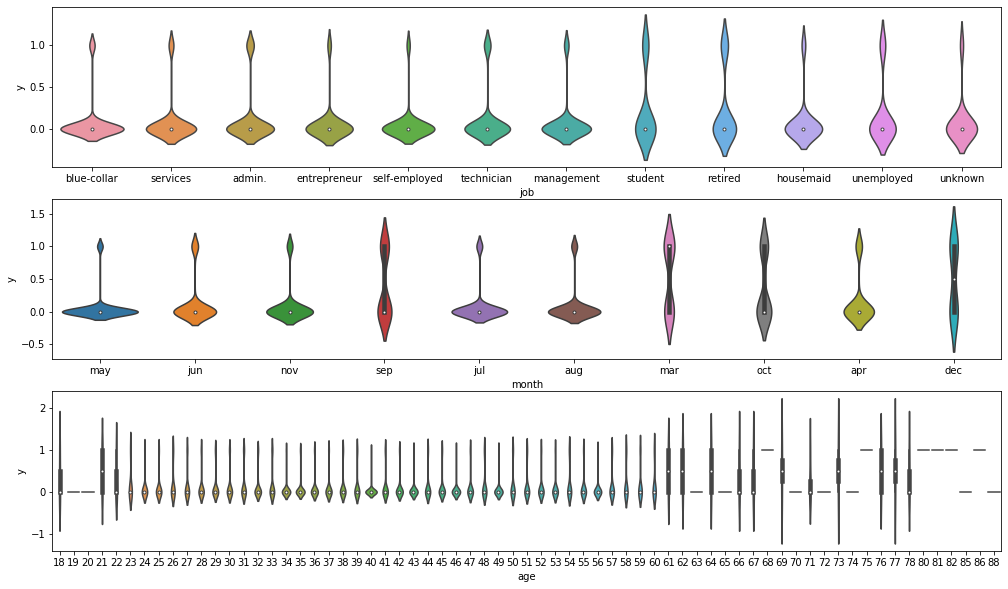

In [24]:
#нарисуйте ящики с усами отноосительно таргета по 3 значимым факторам из количественных переменных 
#и по 3 значимым факторам на основании добавления по лучшему фактору
#какие факторы лучше описывают зависимость от y?

fig, ax = plt.subplots(3, 1, figsize=(17,10))

for i in range(3):
    sns.violinplot(x=train.columns[indices][i], y='y', data=train, ax=ax[i])

# заново

In [28]:
train = train0.copy()
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [29]:
#выделим категариальные признаки  и количественные признаки

cat_feats = []
num_feats = []

for feat in train.dtypes.keys():
    if train.dtypes[feat] == 'object' and feat != 'y':
        cat_feats.append(feat)
    elif feat != 'y':
        num_feats.append(feat)

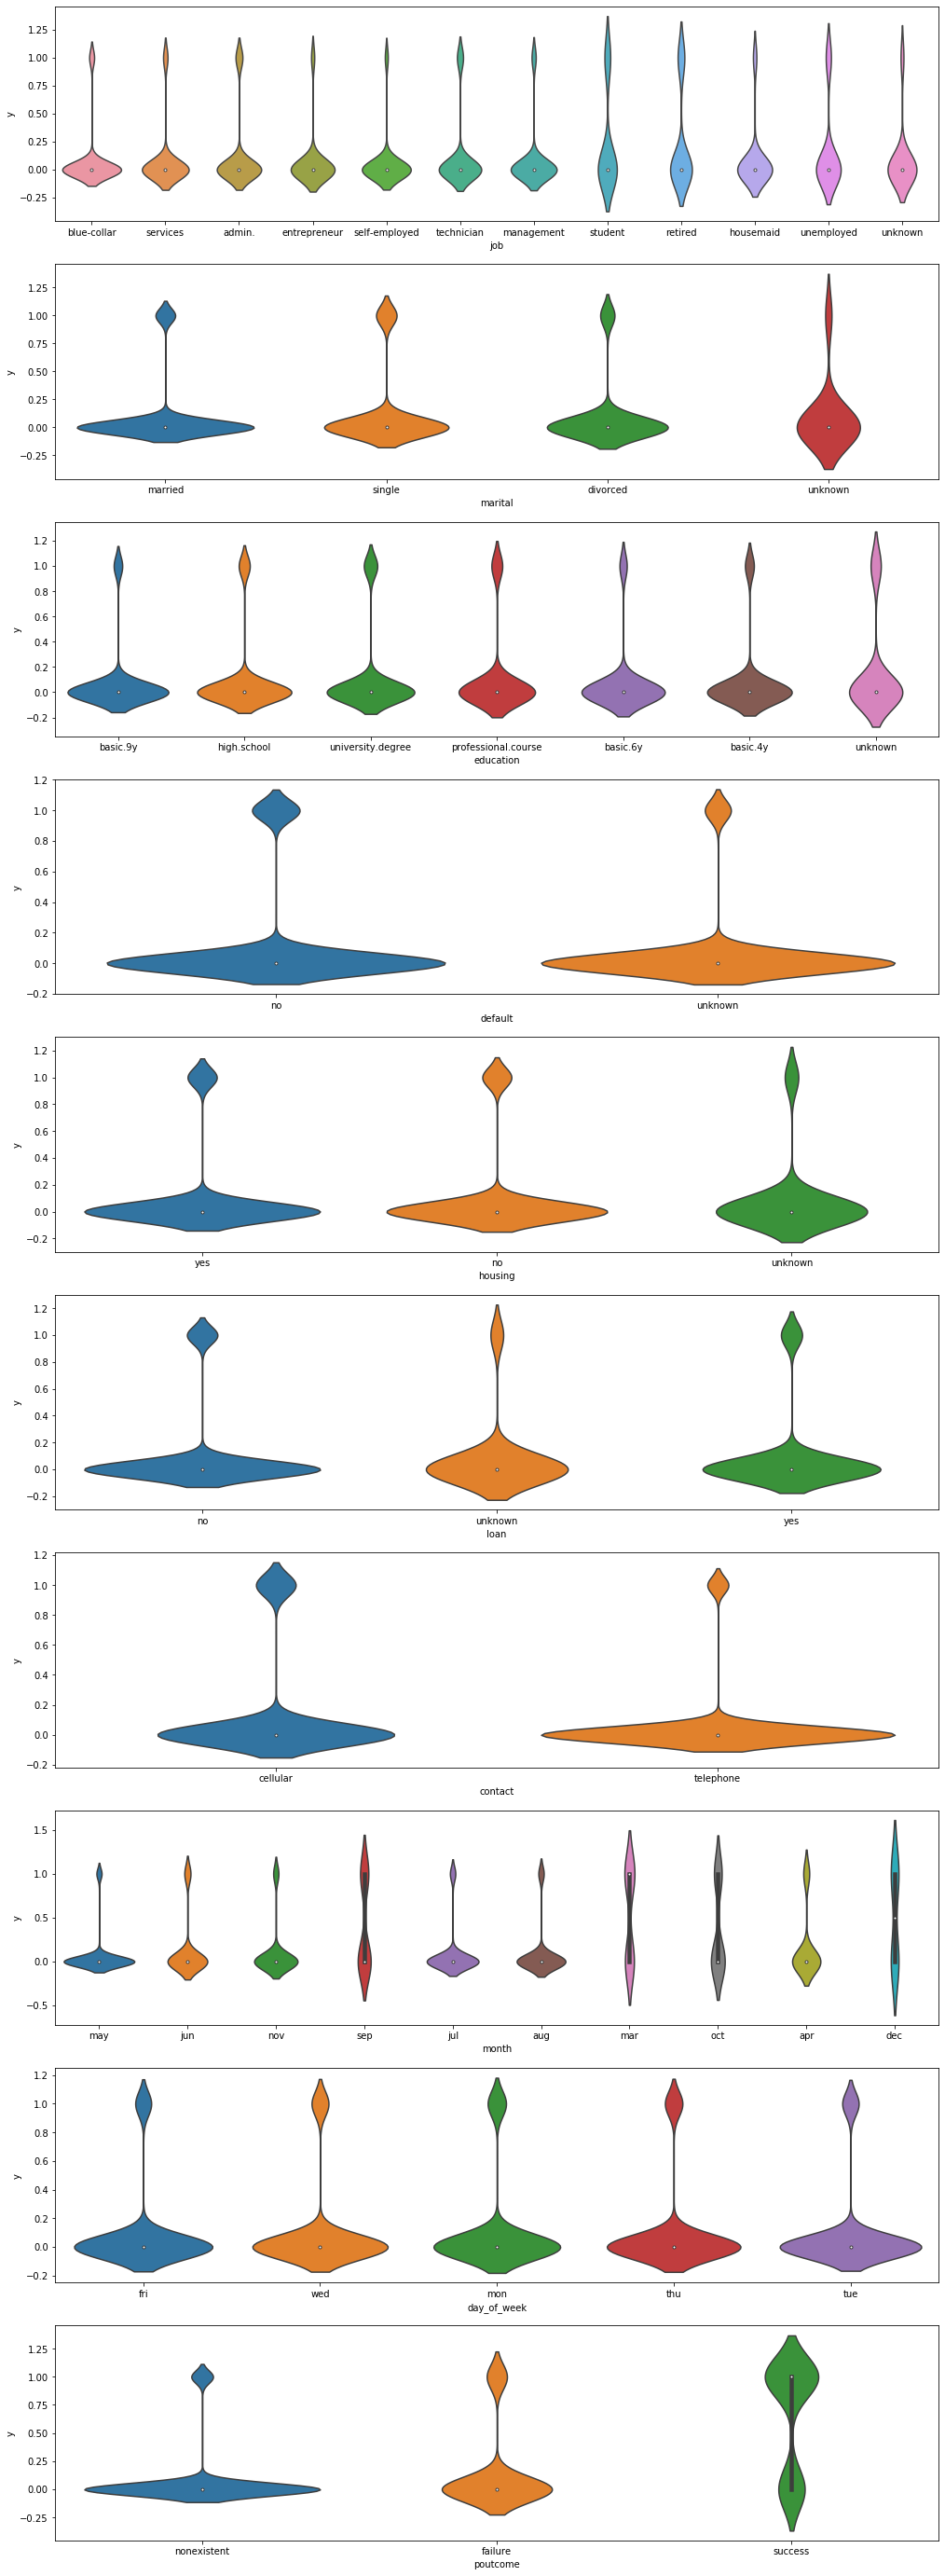

In [44]:
l = len(cat_feats)
fig, ax = plt.subplots(l, 1, figsize=(17,50))

for i in range(l):
    sns.violinplot(x=cat_feats[i], y='y', data=train, ax=ax[i])

1. 'job' - student, retired
2. 'marital'- 
3. 'education'- 
4. 'default',
5. 'housing'- 
6. 'loan'- 
7. 'contact'- 
8. 'month'- разное
9. 'day_of_week'- 
10. 'poutcome'- разное 

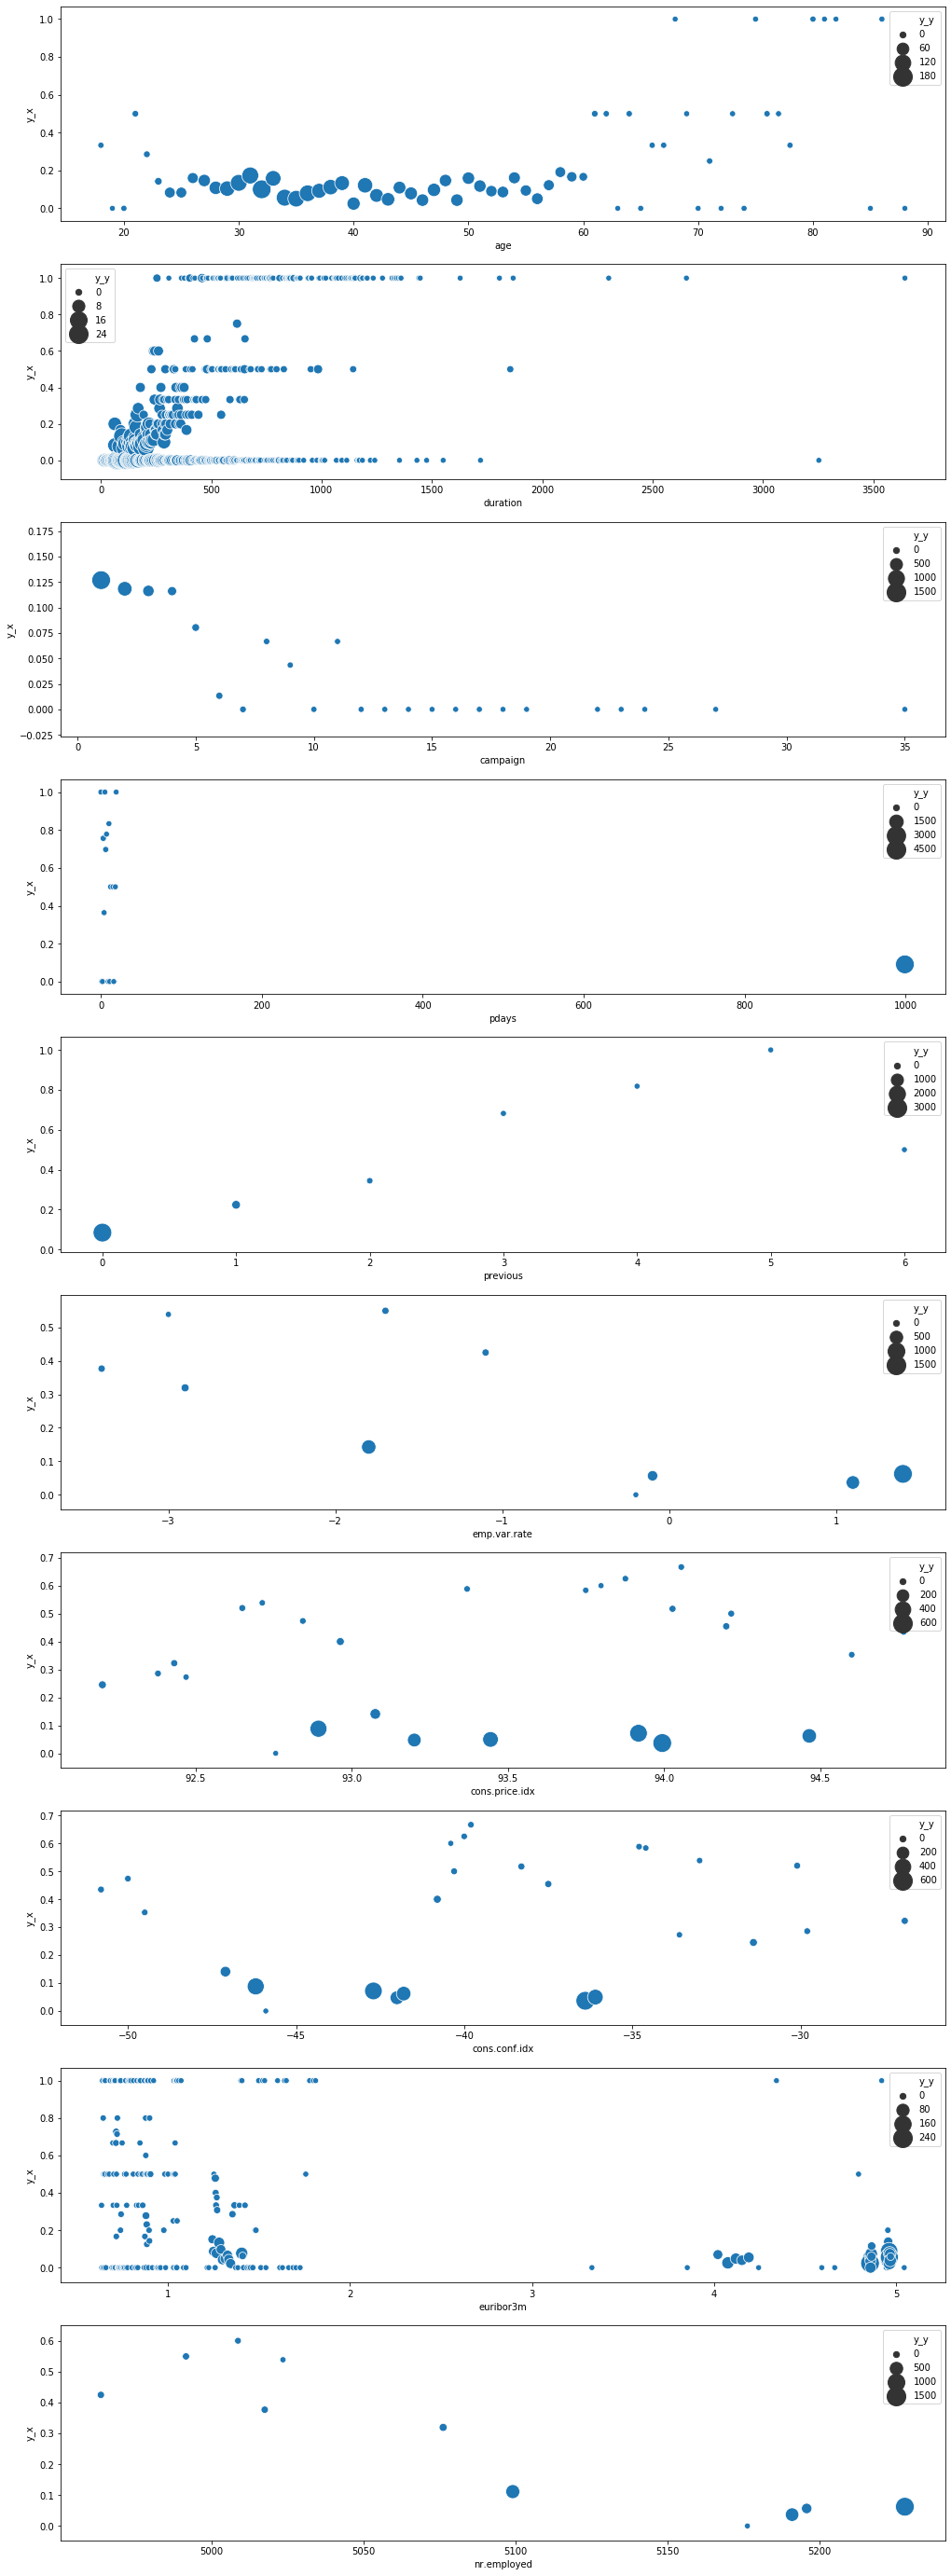

In [125]:
l = len(cat_feats)
fig, ax = plt.subplots(l, 1, figsize=(17,50))

for i in range(l):
    temp_feat = num_feats[i]
    temp_df = pd.merge(train.groupby(by=temp_feat).mean()["y"].reset_index(),
                       train.groupby(by=temp_feat).count()["y"].reset_index(),
                       on=temp_feat)
    #sns.distplot(a=temp_df, ax=ax[i]) # , axlabel=temp_feat
    #sns.lineplot(x=temp_feat, y="y", data=temp_df, ax=ax[i])
    sns.scatterplot(x=temp_feat, y="y_x", size='y_y', sizes=(40,400), data=temp_df, ax=ax[i])

In [119]:
temp_df

,nr.employed,y_x,y_y
0,4963.6,0.424658,73
1,4991.6,0.549296,71
2,5008.7,0.600000,45
3,5017.5,0.376623,77
4,5023.5,0.538462,13
5,5076.2,0.319328,119
6,5099.1,0.111280,656
7,5176.3,0.000000,1
8,5191.0,0.036728,599
9,5195.8,0.056667,300


1. age - можно выделить группу
2. duration - каша
3. campaign - что-то есть но нелинейное
4. pdays - каша, ВЫБРОС
5. previous - что-то
6. emp.var.rate - не очень
7. cons.price.idx - каша
8. cons.conf.idx - каша
9. euribor3m - каша
10. nr. employed - что-то есть но нелинейное

In [53]:
train.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.039014,-0.006501,-0.040607,0.044000,-0.011676,0.008798,0.086147,-0.009824,-0.036183,0.053425
duration,0.039014,1.000000,-0.097477,-0.045726,0.025395,-0.028857,0.022067,-0.036543,-0.033147,-0.046760,0.433596
campaign,-0.006501,-0.097477,1.000000,0.058314,-0.090741,0.177055,0.145429,0.007416,0.159980,0.162461,-0.079928
pdays,-0.040607,-0.045726,0.058314,1.000000,-0.590461,0.271116,0.046450,-0.093359,0.303687,0.390379,-0.344608
previous,0.044000,0.025395,-0.090741,-0.590461,1.000000,-0.409944,-0.141692,-0.054761,-0.458122,-0.520039,0.268134
emp.var.rate,-0.011676,-0.028857,0.177055,0.271116,-0.409944,1.000000,0.747513,0.219751,0.969968,0.892328,-0.259834
cons.price.idx,0.008798,0.022067,0.145429,0.046450,-0.141692,0.747513,1.000000,0.063948,0.645568,0.450870,-0.065774
cons.conf.idx,0.086147,-0.036543,0.007416,-0.093359,-0.054761,0.219751,0.063948,1.000000,0.300212,0.130593,0.034768
euribor3m,-0.009824,-0.033147,0.159980,0.303687,-0.458122,0.969968,0.645568,0.300212,1.000000,0.940434,-0.278375
nr.employed,-0.036183,-0.046760,0.162461,0.390379,-0.520039,0.892328,0.450870,0.130593,0.940434,1.000000,-0.332281


# оценка стат значимости коэффициентов

In [105]:
num_feats

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [156]:
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

#постройте полиномиальную модель прогноза y от зависимости квадрата возраста (age) , третей степени продолжительности (duration) 
#и первой степени дней (pdays) на данных train

train = train0.copy()
train.rename(columns={"emp.var.rate": "empvarrate", "cons.price.idx": "conspriceidx", "cons.conf.idx": "consconfidx", "nr.employed": "nremployed"}, inplace=True)
train = ThresoldFieldEncoder(train, 'pdays', 'pdays_the', 100)

m1 = smf.ols('y ~ job + month + day_of_week + poutcome + duration + pdays_the + previous + euribor3m + empvarrate + consconfidx + nremployed' , data = train)
#m1 = smf.ols('y ~ job + month + poutcome + age + campaign + previous + nremployed' , data = train)

fitted = m1.fit()


#выведете саммари модели
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     57.35
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          5.28e-293
Time:                        12:15:08   Log-Likelihood:                -107.27
No. Observations:                3222   AIC:                             282.5
Df Residuals:                    3188   BIC:                             489.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# QQ график

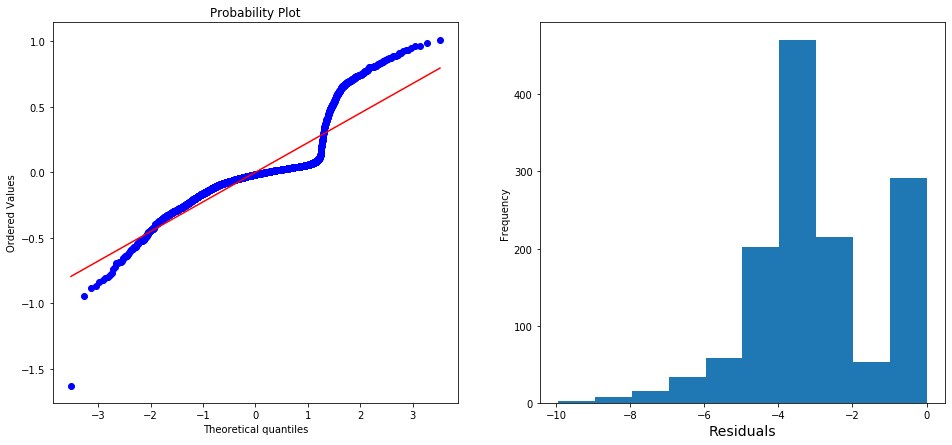

In [114]:
import scipy as sc 

#постройте QQ график и дайте его оценку, точна ли модель на созданных факторах?
#как можно улучшить модель?

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid , dist = 'norm' ,plot = pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [117]:
train = train0.copy()
train.pdays.value_counts()

999    3099
3        41
6        33
4        11
7         9
10        6
12        4
5         4
2         3
1         2
18        2
15        2
0         2
16        1
19        1
9         1
11        1
Name: pdays, dtype: int64